# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [2]:
from palmerpenguins import load_penguins
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

In [5]:
penguins = load_penguins()
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [16]:
# Linear Regression
X = penguins.drop("bill_depth_mm", axis = 1)
y = penguins["bill_depth_mm"]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

lr = LinearRegression()
enc = OneHotEncoder()

ct = ColumnTransformer(
    [("dummify_1", enc, ["species"]),
    ("dummify_2", enc, ["island"]),
    ("dummify_3", enc, ["sex"])]
)

my_pipeline = Pipeline(
    [("dummify_everything", ct), ("ols", lr)]
)

In [41]:
fitted_pipeline = my_pipeline.fit(X_train, y_train)

y_pred = fitted_pipeline.predict(X_test)

r2 = r2_score(y_true = y_test, y_pred = y_pred)

X_testlm = X_test
X_testlm["pred"] = y_pred

print(f"R^2: {r2}")

R^2: 0.7914918868569407


In [54]:
# Quadratic Regression
X_train, X_test, y_train, y_test = train_test_split(X, y)

lr = LinearRegression()
enc = OneHotEncoder()

ct = ColumnTransformer(
    [("dummify_1", enc, ["species"]),
    ("dummify_2", enc, ["island"]),
    ("dummify_3", enc, ["sex"]),
    ("Square", PolynomialFeatures(degree = (1, 2)), ["bill_length_mm"])]
)

my_pipeline = Pipeline(
    [("dummify_everything and square", ct), ("ols", lr)]
)

In [55]:
fitted_pipeline = my_pipeline.fit(X_train, y_train)

y_pred = fitted_pipeline.predict(X_test)

r2 = r2_score(y_true = y_test, y_pred = y_pred)

X_testsq = X_test
X_testsq["pred"] = y_pred

print(f"R^2: {r2}")

R^2: 0.8372267908741365


In [44]:
# Cubic Regression
X_train, X_test, y_train, y_test = train_test_split(X, y)

lr = LinearRegression()
enc = OneHotEncoder()

ct = ColumnTransformer(
    [("dummify_1", enc, ["species"]),
    ("dummify_2", enc, ["island"]),
    ("dummify_3", enc, ["sex"]),
    ("Cube", PolynomialFeatures(degree = (1, 3)), ["bill_length_mm"])]
)

my_pipeline = Pipeline(
    [("dummify_everything and cube", ct), ("ols", lr)]
)

In [45]:
fitted_pipeline = my_pipeline.fit(X_train, y_train)

y_pred = fitted_pipeline.predict(X_test)

r2 = r2_score(y_true = y_test, y_pred = y_pred)

X_testcr = X_test
X_testcr["pred"] = y_pred

print(f"R^2: {r2}")

R^2: 0.8328082189110771


In [46]:
# 10 Factor Regression
X_train, X_test, y_train, y_test = train_test_split(X, y)

lr = LinearRegression()
enc = OneHotEncoder()

ct = ColumnTransformer(
    [("dummify_1", enc, ["species"]),
    ("dummify_2", enc, ["island"]),
    ("dummify_3", enc, ["sex"]),
    ("Cube", PolynomialFeatures(degree = (1, 10)), ["bill_length_mm"])]
)

my_pipeline = Pipeline(
    [("dummify_everything and 10-factor", ct), ("ols", lr)]
)

In [47]:
fitted_pipeline = my_pipeline.fit(X_train, y_train)

y_pred = fitted_pipeline.predict(X_test)

r2 = r2_score(y_true = y_test, y_pred = y_pred)

X_test10r = X_test
X_test10r["pred"] = y_pred

print(f"R^2: {r2}")

R^2: 0.24128483974819082


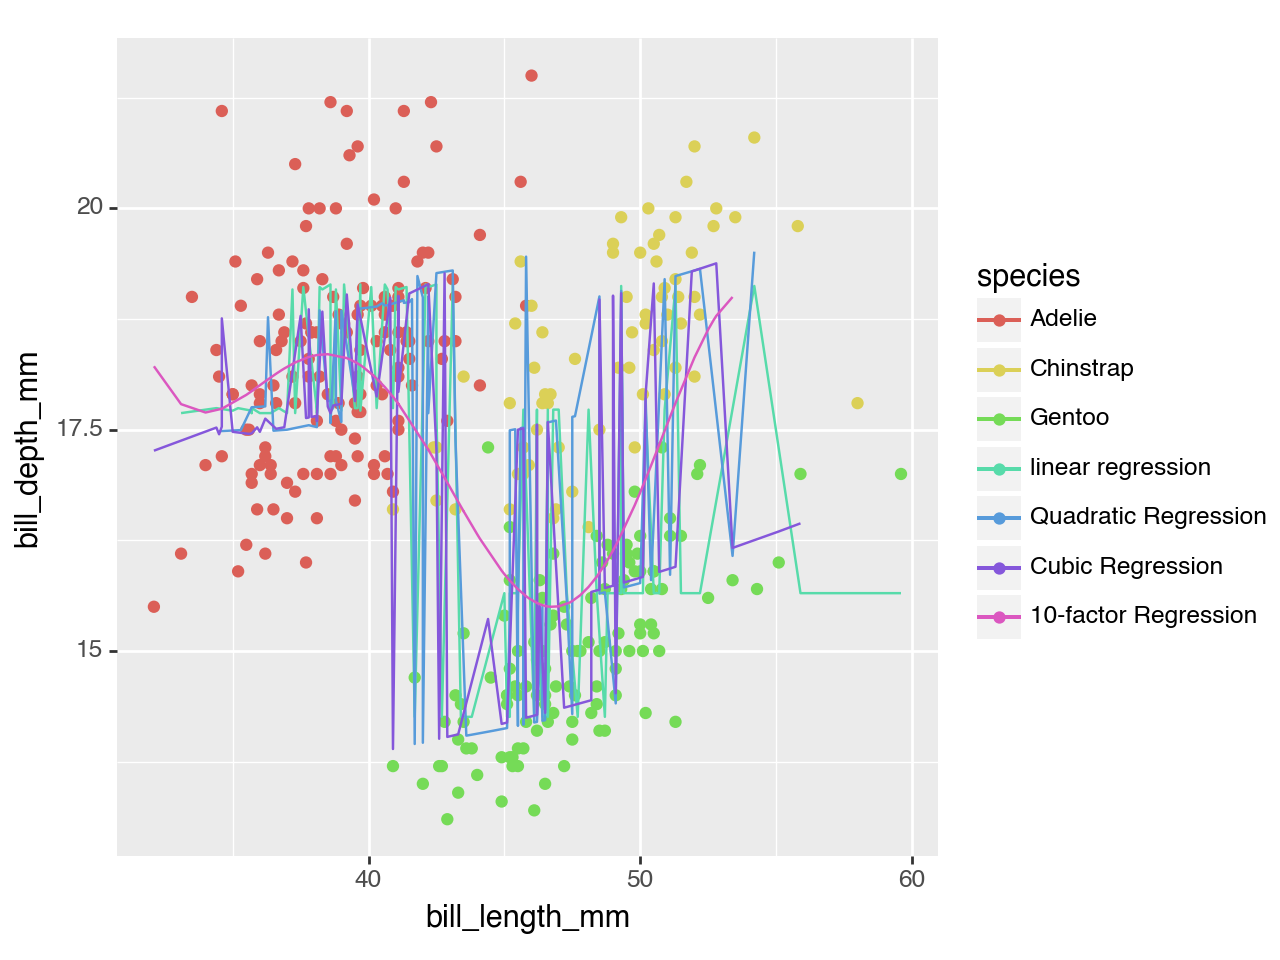

<Figure Size: (640 x 480)>

In [56]:
from plotnine import ggplot, aes, geom_point, geom_line, labs
(ggplot(penguins, aes(x = "bill_length_mm", y = "bill_depth_mm", color = "species")) + 
    geom_point() +
    geom_line(X_testlm, aes(x = "bill_length_mm", y = "pred", color = '"linear regression"'), inherit_aes = False) +
    geom_line(X_testsq, aes(x = "bill_length_mm", y = "pred", color = '"Quadratic Regression"'), inherit_aes = False) +
    geom_line(X_testcr, aes(x = "bill_length_mm", y = "pred", color = '"Cubic Regression"'), inherit_aes = False) + 
    geom_line(X_test10r, aes(x = "bill_length_mm", y = "pred", color = '"10-factor Regression"'), inherit_aes = False))

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [ ]:
# Code Here
